# Support Vector Regression(SVR)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('Position_Salaries.csv')

In [3]:
#Dimension of a dataframe
df.shape

(10, 3)

In [4]:
#Viewing dataframe
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
#Seperate Dependent and Independent columns
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [6]:
#Independent column
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
#Depedent column
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
#Reshaping y
y = y.reshape(len(y), 1)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [10]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Implement SVR(Support Vector Regression)

In [12]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

C:\Users\admin\conda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [13]:
#Predicting a new result
scaler.inverse_transform(svr.predict(scaler.transform([[6.5]])))

array([87714.85539438])

### Visualizing the SVR results

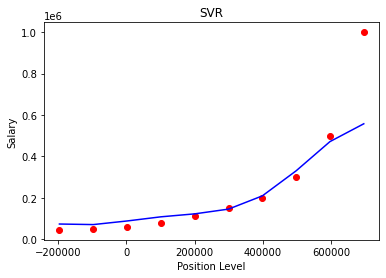

In [14]:
plt.scatter(scaler.inverse_transform(X), scaler.inverse_transform(y), color='red')
plt.plot(scaler.inverse_transform(X), scaler.inverse_transform(svr.predict(X)), color='blue')
plt.title("SVR")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the SVR results (for higher resolution and smoother curve)

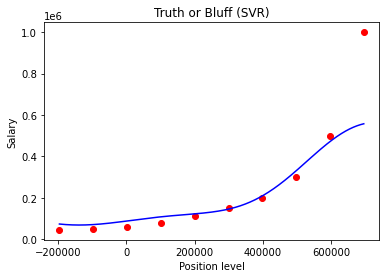

In [15]:
X_grid = np.arange(min(scaler.inverse_transform(X)), max(scaler.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scaler.inverse_transform(X), scaler.inverse_transform(y), color = 'red')
plt.plot(X_grid, scaler.inverse_transform(svr.predict(scaler.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()